### Student Information
Name: Retnani Latifah

Student ID: 111062860

GitHub ID: 127463521

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

### Take Home Exercise Part


In [1]:
### Begin Assignment Here

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
#libraries
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [5]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [6]:
# add category to the dataframe
X['category'] = twenty_train.target

In [7]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

#### Exercise 2

In [8]:
X[5::10] #get every tenth data from index 5

,text,category,category_name
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,1,comp.graphics
35,From: BOCHERC@hartwick.edu Subject: Does God L...,3,soc.religion.christian
45,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...,0,alt.atheism
...,...,...,...
2215,From: michael@iastate.edu (Michael M. Huang) S...,2,sci.med
2225,From: Desiree_Bradley@mindlink.bc.ca (Desiree ...,3,soc.religion.christian
2235,From: dougb@comm.mot.com (Doug Bank) Subject: ...,2,sci.med
2245,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...,2,sci.med


In [9]:
X_copy=  X.copy() #make a copy dataframe
X_copy

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [10]:
X_copy.iloc[3:7, lambda X_copy: [0, 2]]  #show row 3 to 6 only for column text and category_name

,text,category_name
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian


In [11]:
del X_copy #delete dataframe

In [12]:
labels = [1,10,15,20,100]

X1 = X.reindex(labels) #make different dataframe from certain indexes
X1

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
100,From: mathew <mathew@mantis.co.uk> Subject: Re...,0,alt.atheism


In [13]:
X2 = X1.set_index('category_name') #change one of the column as index
X2

,text,category
category_name,,
comp.graphics,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
soc.religion.christian,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3
comp.graphics,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1
soc.religion.christian,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3
alt.atheism,From: mathew <mathew@mantis.co.uk> Subject: Re...,0


In [14]:
X2.reset_index() #reset the index

,category_name,text,category
0,comp.graphics,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
1,soc.religion.christian,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3
2,comp.graphics,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1
3,soc.religion.christian,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3
4,alt.atheism,From: mathew <mathew@mantis.co.uk> Subject: Re...,0


In [15]:
criterion = X1['category_name'].map(lambda x: x.startswith('comp')) #filtering using a condition

In [16]:
X1[criterion]

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics


#### Exercise 5

In [17]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [18]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [19]:
# Answer here

"""
The one considered as missing values are only the first, second and fifth entries (index 0,1 and 4). This is because the
entries for index 2,3 and 5 are actually string not a null. All of these statements ('Nan', 'None', '') are considered string
due to the use of '' after  'missing_example' :
Meanwhile for index 0, it is the correct null which is defined by np.NaN, a statement to make a NaN entry using numpy library. 
As for index 1, there is no entry value for missing_value, thus it is considered as null / NaN. 
For index 4, it is defined by None, a python keyword to define null objects or variables

If all of them want to be considered as null then the ('Nan', 'None', '') need to be changed to either np.nan or None or
no entry at all. example is below
"""

NA_dict1 = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': np.nan  },
           { 'id': 'D', 'missing_example': np.nan },
           { 'id': 'E', 'missing_example':  None },
           { 'id': 'F', 'missing_example': np.nan  }]
NA_df1 = pd.DataFrame(NA_dict1, columns = ['id','missing_example'])
NA_df1['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

#### Exercise 6

In [20]:
X_sample = X.sample(n=1000,random_state=42) #random state
X_sample[:5]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


In [21]:
# Answer here
"""
The data in X_sample is not in the order as their index (the rows), it is random. However, even if the sample code run 
several time, the same random sample will be shown (due to random_state being defined. The column order is the same. 
The number of each category in the sample is similar to the number of X data, around 45% of total of each category to make up
1000 data. In querying the X_sample data using X[:5], it will not show the data with index 0-4 like in X data,
but the data with other indexes stored in index 0-4 in the X_sample. It also worked when we query using iloc, but when we 
queried using X_sample.loc, it will give errors.
"""

X_sample.iloc[:5]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


In [22]:
X_sample.loc[:5] #the output showed the error

KeyError: 5

#### Exercise 8 Bar Chart

<Axes: title={'center': 'Category distribution'}>

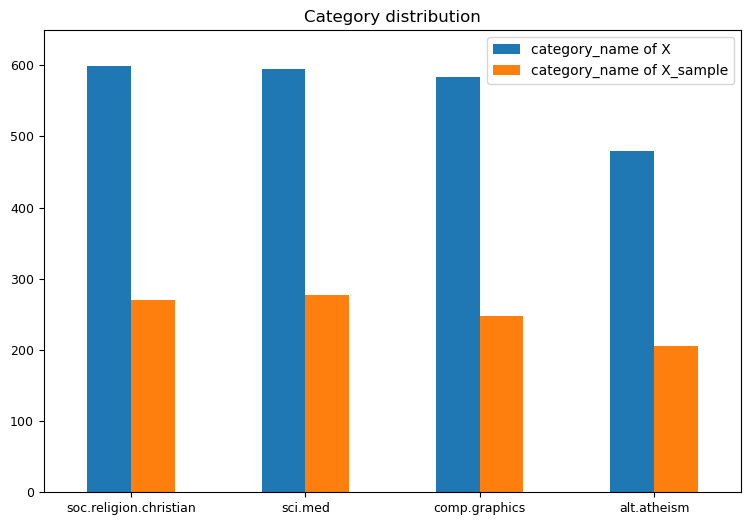

In [23]:
# Answer here

#make the counts of category_name as separate dataframe with the category_name as index
#for both X and X_sample, so there will be two dataframe
numofX = X.category_name.value_counts().rename_axis('unique_values').to_frame('category_name of X')
numofXSample = X_sample.category_name.value_counts().rename_axis('unique_values').to_frame('category_name of X_sample')

#combine the two dataframe into one based on the index and make the index as column (reset_index())
dfCountCat = pd.concat([numofX, numofXSample], axis=1).reset_index()

#calculate the highest bound 
upper_bound = max(X.category_name.value_counts() + 50)

#plot the chart
dfCountCat.plot(kind = 'bar',
                x = 'unique_values',
                y = ['category_name of X', 'category_name of X_sample'], #category_name from X and X_sample, make it side by side
                title = 'Category distribution',
                xlabel = '',
                ylim = [0, upper_bound], 
                rot = 0, fontsize = 9, figsize = (9,6))

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\retna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Exercise 10

In [25]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [29]:
#answer for the question
#to get the feature of 1 from record 5 beside the first one
#count_vect.get_feature_names_out()[37:38]
print('The other feature, is :',count_vect.get_feature_names_out()[37:38])

The feature name is : ['01']


In [30]:
#to make sure this is the right one in the array
X_counts[4:5, :38].toarray() #get record 5, and get the one from first cell to the other 1

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

#### Exercise 11 HeatMap

In [154]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
print(plot_x)

['term_00', 'term_000', 'term_0000', 'term_0000001200', 'term_000005102000', 'term_0001', 'term_000100255pixel', 'term_00014', 'term_000406', 'term_0007', 'term_000usd', 'term_0010', 'term_001004', 'term_0010580b', 'term_001125', 'term_001200201pixel', 'term_0014', 'term_001642', 'term_00196', 'term_002', 'term_0028', 'term_003258u19250', 'term_0033', 'term_0038', 'term_0039', 'term_004021809', 'term_004158', 'term_004627', 'term_0049', 'term_00500', 'term_005148', 'term_00630', 'term_008561', 'term_0094', 'term_00am', 'term_00index', 'term_00pm', 'term_01', 'term_0100', 'term_010116', 'term_010702', 'term_011255', 'term_011308pxf3', 'term_011605', 'term_011720', 'term_012019', 'term_012536', 'term_012946', 'term_013', 'term_013034', 'term_0131', 'term_013423tan102', 'term_013657', 'term_0138', 'term_013846', 'term_0150', 'term_015518', 'term_01580', 'term_015931', 'term_01720', 'term_01752', 'term_0179', 'term_01821', 'term_01830', 'term_0184', 'term_01852', 'term_01854', 'term_01890'

In [156]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29', 'doc_30', 'doc_31', 'doc_32', 'doc_33', 'doc_34', 'doc_35', 'doc_36', 'doc_37', 'doc_38', 'doc_39', 'doc_40', 'doc_41', 'doc_42', 'doc_43', 'doc_44', 'doc_45', 'doc_46', 'doc_47', 'doc_48', 'doc_49', 'doc_50', 'doc_51', 'doc_52', 'doc_53', 'doc_54', 'doc_55', 'doc_56', 'doc_57', 'doc_58', 'doc_59', 'doc_60', 'doc_61', 'doc_62', 'doc_63', 'doc_64', 'doc_65', 'doc_66', 'doc_67', 'doc_68', 'doc_69', 'doc_70', 'doc_71', 'doc_72', 'doc_73', 'doc_74', 'doc_75', 'doc_76', 'doc_77', 'doc_78', 'doc_79', 'doc_80', 'doc_81', 'doc_82', 'doc_83', 'doc_84', 'doc_85', 'doc_86', 'doc_87', 'doc_88', 'doc_89', 'doc_90', 'doc_91', 'doc_92', 'doc_93', 'doc_94', 'doc_95', 'doc_96', 'doc_97', 'doc_98', 'doc_99', 'doc_100'

In [157]:
plot_z = X_counts.toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
#display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

[0, 1, 4]


0
1
4


365886